In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('churn_logistic.csv')
churn.shape

(5700, 21)

In [3]:
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [6]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

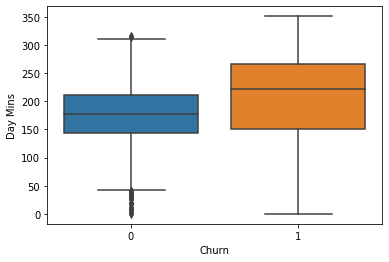

In [7]:
sns.boxplot(x='Churn', y='Day Mins', data=churn);

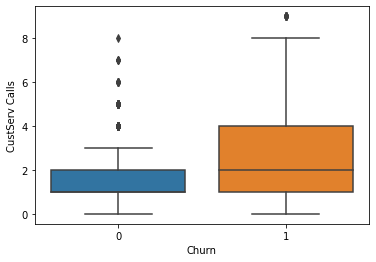

In [8]:
sns.boxplot(x='Churn', y='CustServ Calls', data=churn);

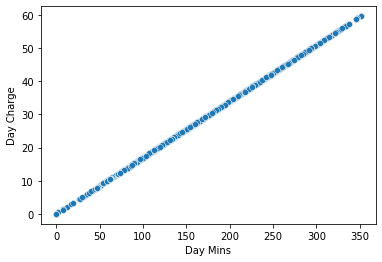

In [9]:
sns.scatterplot(x='Day Mins', y = 'Day Charge', data= churn);

In [10]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan', 'VMail Message']
X = churn[cols]
y = churn['Churn']

In [12]:
X.shape

(5700, 5)

In [16]:
y.shape

(5700,)

In [20]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)

In [22]:
X_train.shape, X_val.shape, X_test.shape

((3420, 5), (1140, 5), (1140, 5))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # learning mu and sig from training data. 


X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(penalty='l2')

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
model.coef_

array([[ 0.78670623,  0.31093629,  0.94086792,  0.8692631 , -0.31783734]])

In [29]:
model.score(X_train, y_train)

0.7564327485380117

In [30]:
model.score(X_val, y_val)

0.7578947368421053

### Hyper parameter tuning  (C)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [47]:
train_scores = []
val_scores = []

for c in np.arange(0.0001, 0.1, 0.001):
    model = LogisticRegression(penalty='l2', C = c)
    model.fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    
    train_scores.append(tr_score)
    val_scores.append(val_score)

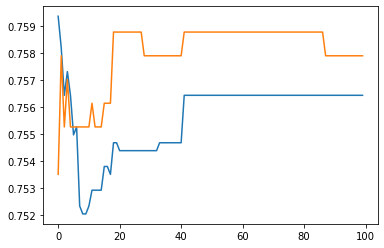

In [48]:
plt.plot(train_scores)
plt.plot(val_scores)

# final - performance on test

In [49]:
model.score(X_test, y_test)

0.7657894736842106